In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bm import meta_dataset
from bm import meta_preprocess
from pathlib import Path
import bm
import sys
import os
from hydra import initialize, compose
import hydra
hydra.core.global_hydra.GlobalHydra.instance().clear()

sys.argv=['self.py']

os.chdir(Path(bm.__file__).parent.parent)
print(os.getcwd())
with initialize(version_base="1.1", config_path="conf"):
    cfg = compose(config_name="config.yaml", overrides=['+HYDRA_FULL_ERROR=1'])
    subs, word_index, additional_info = meta_preprocess.main(cfg)

Hostname lukas-B550-AORUS-ELITE-AX-V2 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
/home/lukas/miniforge3/envs/lavis-bm3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Hostname lukas-B550-AORUS-ELITE-AX-V2 not defined in /conf/study_paths/study_paths.yaml. Using default paths.


/home/lukas/projects/brainmagick
hello there good sir.
Opening raw data file /home/lukas/projects/brainmagick/cache/studies/gwilliams2022/01_session0_story0/meg-sr120-hp0-raw.fif...
Isotrak not found
    Range : 0 ... 47519 =      0.000 ...   395.992 secs
Ready.
Opening raw data file /home/lukas/projects/brainmagick/cache/studies/gwilliams2022/01_session0_story1/meg-sr120-hp0-raw.fif...
Isotrak not found
    Range : 0 ... 85919 =      0.000 ...   715.992 secs
Ready.
Opening raw data file /home/lukas/projects/brainmagick/cache/studies/gwilliams2022/01_session0_story2/meg-sr120-hp0-raw.fif...
Isotrak not found
    Range : 0 ... 143039 =      0.000 ...  1191.992 secs
Ready.
Opening raw data file /home/lukas/projects/brainmagick/cache/studies/gwilliams2022/01_session0_story3/meg-sr120-hp0-raw.fif...
Isotrak not found
    Range : 0 ... 224279 =      0.000 ...  1868.992 secs
Ready.
[Gwilliams2022Recording('01_session0_story0'), Gwilliams2022Recording('01_session0_story1'), Gwilliams2022Recor

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
4it [01:28, 22.05s/it]


11.715921037262003
0.7999999999999972


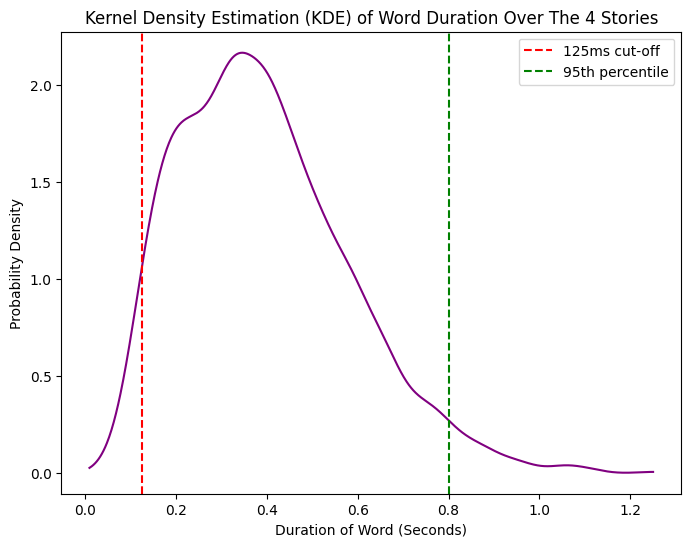

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import percentileofscore

segment_lengths = additional_info['segment_lengths']
durations = additional_info['durations']

# Convert to probability distribution
probability_distribution = durations / np.sum(durations)

# Use KDE for smoothing
kde = gaussian_kde(durations, weights=probability_distribution)
x_vals = np.linspace(min(durations), max(durations), 1000)  # 1000 points between min and max of data for smooth curve
y_vals = kde(x_vals)

percentile_10 = np.percentile(durations, 10)
percentile_95 = np.percentile(durations, 99)
chosen_number = 0.125
percentile_of_score = percentileofscore(durations, chosen_number)
print(percentile_of_score)
print(percentile_95)

# Plot the smoothed distribution
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='purple')
# plt.axvline(percentile_5, color='red', linestyle='--', label='5th Percentile')
# plt.axvline(percentile_10, color='red', linestyle='--', label='10th Percentile cut-off')
plt.axvline(chosen_number, color='red', linestyle='--', label='125ms cut-off')
plt.axvline(percentile_95, color='green', linestyle='--', label='95th percentile')
plt.xlabel('Duration of Word (Seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Kernel Density Estimation (KDE) of Word Duration Over The 4 Stories')
plt.show()


In [19]:
audio_embeddings_sizes = additional_info['audio_embeddings_sizes']

mean = np.mean(audio_embeddings_sizes)
percentile_10 = np.percentile(audio_embeddings_sizes, 10)
percentile_90 = np.percentile(audio_embeddings_sizes, 90)
percentile_95 = np.percentile(audio_embeddings_sizes, 95)

mean, percentile_10, percentile_90

(16.31155632984901, 7.0, 28.0)

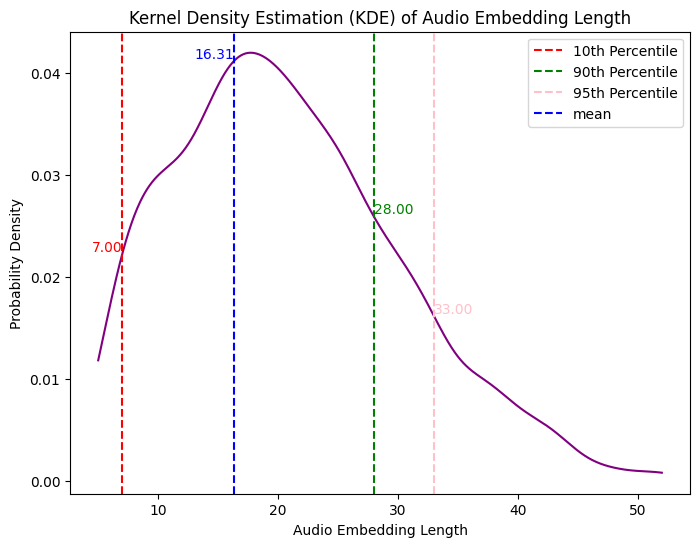

In [20]:
probability_distribution = audio_embeddings_sizes / np.sum(audio_embeddings_sizes)
kde = gaussian_kde(audio_embeddings_sizes, weights=probability_distribution)
x_vals = np.linspace(min(audio_embeddings_sizes), max(audio_embeddings_sizes), 1000)  # 1000 points between min and max of data for smooth curve
y_vals = kde(x_vals)
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='purple')
plt.axvline(percentile_10, color='red', linestyle='--', label='10th Percentile')
plt.axvline(percentile_90, color='green', linestyle='--', label='90th Percentile')
plt.axvline(percentile_95, color='pink', linestyle='--', label='95th Percentile')
plt.axvline(mean, color='blue', linestyle='--', label='mean')
# plt.axvline(percentile_10, color='red', linestyle='--', label='10th Percentile cut-off')
# plt.axvline(chosen_number, color='red', linestyle='--', label='125ms cut-off')
plt.text(percentile_10, kde(percentile_10)[0], f'{percentile_10:.2f}', color='red', ha='right', va='bottom')
plt.text(percentile_90, kde(percentile_90)[0], f'{percentile_90:.2f}', color='green', ha='left', va='bottom')
plt.text(percentile_95, kde(percentile_95)[0], f'{percentile_95:.2f}', color='pink', ha='left', va='bottom')
plt.text(mean, kde(mean)[0], f'{mean:.2f}', color='blue', ha='right', va='bottom')
plt.xlabel('Audio Embedding Length')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Kernel Density Estimation (KDE) of Audio Embedding Length')
plt.show()

In [14]:
for info in infos:
    print(info['subject_info']['his_id'])

sub-01
sub-01
sub-01
sub-01
sub-01
sub-01
sub-01
sub-01
sub-02
sub-02
sub-02
sub-02
sub-02
sub-02
sub-02
sub-02


In [17]:
sub_ids = []
subs_list = []
for id, sub in subs.items():
    sub_ids.append(id)
    subs_list.append(sub)

In [22]:
from sklearn.model_selection import train_test_split

train_subs, test_subs, train_sub_ids, test_sub_ids = train_test_split(subs_list, sub_ids, test_size=0.2, random_state=42, shuffle=True)
# train_subs, test_subs = subs[:-1], subs[-1]
# train_subs, test_subs = subs, None

In [24]:
train_sub_ids

['sub-01']

In [25]:
from bm.meta_dataset import SubDataset
from torch.utils.data import DataLoader
train_dset = SubDataset(train_subs, train_sub_ids)
test_dset = SubDataset(test_subs, test_sub_ids)

train_dloader = DataLoader(train_dset, 1)
test_dloader = DataLoader(test_dset, 1)

In [ ]:
import numpy as np
seed = 42
np.random.seed(seed)
# rng = np.random.RandomState(seed)

def random_trial(n_trials, n_subs=1, n_trials_selected=1):
    idxs = []
    for i in range(n_subs):
        idxs.append(np.random.choice(n_trials, n_trials_selected, replace=False))

    if len(idxs) == 1:
        idxs = idxs[0]

    return idxs

def random_batch_idxs(trial_len, batch_size=32, n_subs=1, n_trials=1):

    idxs = []
    for i in range(n_subs):
        trials = []
        for j in range(n_trials):
            trials.append(np.random.choice(trial_len, batch_size, replace=False))
        idxs.append(trials)

    while len(idxs) == 1:
        idxs = idxs[0]

    return idxs

def inner_batch_for_sub(sub, batch_idxs):
    pass

In [ ]:
from bm.meta_dataset import TrialsDataset, TrialDataset


def meta_train_rand_trials(model, train_dloader):
    for meta_batch in train_dloader:
        for sub in meta_batch:
            tdset = TrialsDataset(sub)


def meta_train_same_trials(model, train_dloader):

    for meta_batch in train_dloader:
        trial_n = random_trial(n_trials=8)
        idxs = random_batch_idxs(trial_len=len(meta_batch[0][trial_n]), batch_size=32)
        # weights_before = copy(model.state_dict())
        for sub in meta_batch:
            trial = sub[trial_n]
            
            inner_batch_for_sub(trial, idxs)
        # weights_after = model.state_dict()

def model_lol(x):
    return 1

meta_train_rand_trials(model_lol, train_dloader=train_dloader)


